Initial Graph


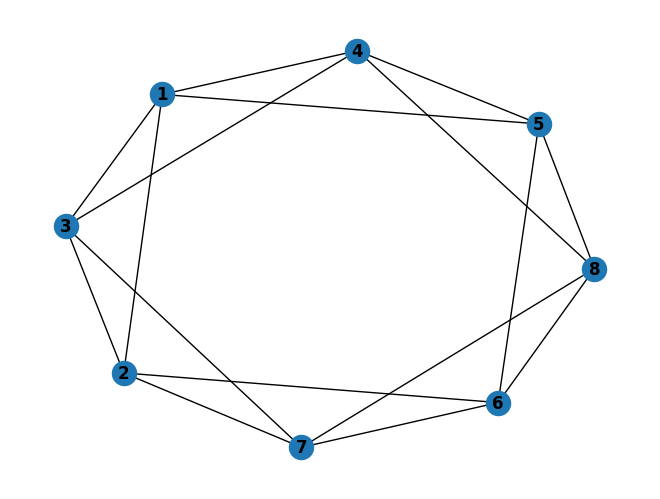

A random Cycle with its bridges


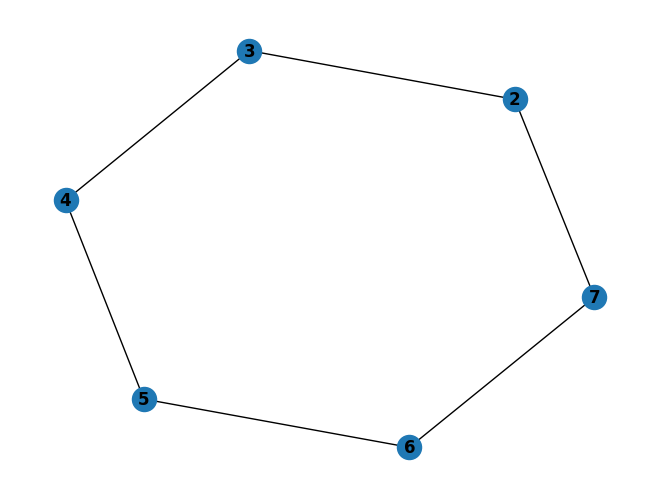

The cycle with its bridges colored


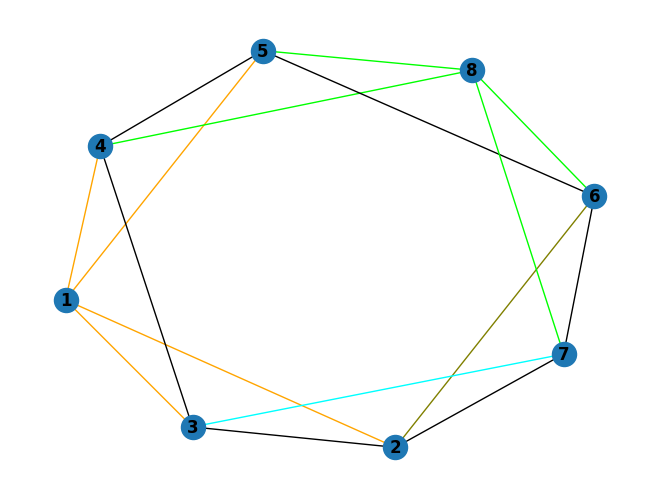

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np


# Create a graph
G = nx.Graph()
G.add_nodes_from([1, 2, 3, 4, 5, 6, 7, 8])
G.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (1, 3), (1, 4), (1, 5), (2, 6), (2, 7), (3, 7), (4, 8), (5, 8), (6, 8)])
print("Initial Graph")
nx.draw(G, with_labels=True, font_weight='bold')
plt.show()

# Planar Algorithm

# Find a cycle in the graph

cycle = nx.find_cycle(G)
cycle = [(2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 2)]

# graph with the cycle
C = nx.Graph()
for edge in cycle:
    C.add_edge(edge[0], edge[1])

print("A random Cycle with its bridges")

nx.draw(C, with_labels=True, font_weight='bold')
plt.show()

# remove the cycle from the graph
G_delete = G.copy()
for edge in cycle:
    G_delete.remove_edge(edge[0], edge[1])

# nx.draw(G_delete, with_labels=True, font_weight='bold')
# plt.show()

# check if the gaph is empty

# determine all bridges in the graph
bridges = []
# get edges for G_delete
edges = G_delete.edges()
def edge_in_order(vertex, neighbor):
    if vertex > neighbor:
        return (neighbor, vertex)
    else:
        return (vertex, neighbor)
G_delete_edges = [edge_in_order(edge[0], edge[1]) for edge in edges]
list_of_class = [i for i in range(len(G_delete_edges))]




for vertex in C.nodes():
    for neighbor in G_delete.neighbors(vertex):
        new_vertex = neighbor
        class_of_edge = list_of_class[G_delete_edges.index(edge_in_order(vertex, neighbor))]
        # breadth first search
        queue = [(vertex, neighbor)]
        first = True
        while len(queue) > 0:
            edge = queue.pop(0)
            not_colored = False
            if list_of_class[G_delete_edges.index(edge_in_order(edge[0], edge[1]))] != class_of_edge or first:
                not_colored = True
            first = False
            list_of_class[G_delete_edges.index(edge_in_order(edge[0], edge[1]))] = class_of_edge
            if edge[1] in C.nodes():
                continue
            for neighbor in G_delete.neighbors(edge[1]):
                if not_colored:
                    queue.append((edge[1], neighbor))
            
# color the edges in the graph G
colors = ['orange', 'purple', 'brown', 'pink',  'olive', 'cyan', 'lime', 'teal', 'navy', 'aquamarine', 'gold', 'indigo', 'ivory', 'khaki', 'lightblue', 'lightgreen', 'lightgrey', 'lightpink', 'lightyellow', 'magenta', 'orange', 'orchid', 'peru', 'plum', 'powderblue', 'rosybrown', 'royalblue', 'saddlebrown', 'salmon', 'seagreen', 'sienna', 'silver', 'skyblue', 'slateblue', 'slategray', 'springgreen', 'steelblue', 'tan', 'thistle', 'tomato', 'turquoise', 'violet', 'wheat', 'yellowgreen']
colored_G = nx.Graph()
for edge in G.edges():
    if edge_in_order(edge[0], edge[1]) in G_delete_edges:
        colored_G.add_edge(edge[0], edge[1], color=colors[list_of_class[G_delete_edges.index(edge_in_order(edge[0], edge[1]))]])
    else:
        colored_G.add_edge(edge[0], edge[1], color='black')
        
# display the colored graph
colored_G_edges = colored_G.edges()
colors = [colored_G[u][v]['color'] for u,v in colored_G_edges]
print("The cycle with its bridges colored")
nx.draw(colored_G, with_labels=True, font_weight='bold', edge_color=colors)
plt.show()
